## Machine Learning 1 Group Project. 
### Predicting the popularity on songs

### Libraries Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from collections import Counter

In [3]:
df = pd.read_csv("../data/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2300 non-null   int64  
 1   track_name         2300 non-null   object 
 2   track_popularity   2300 non-null   int64  
 3   album              2300 non-null   object 
 4   artist_name        2300 non-null   object 
 5   artist_genres      2300 non-null   object 
 6   artist_popularity  2300 non-null   int64  
 7   danceability       2299 non-null   float64
 8   energy             2299 non-null   float64
 9   key                2299 non-null   float64
 10  loudness           2299 non-null   float64
 11  mode               2299 non-null   float64
 12  speechiness        2299 non-null   float64
 13  acousticness       2299 non-null   float64
 14  instrumentalness   2299 non-null   float64
 15  liveness           2299 non-null   float64
 16  valence            2299 

In [4]:
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,132.000000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000


### Exploratory Data Analysis

#### Null values

In [5]:
df.isna().describe()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300
unique,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2300,2300,2300,2300,2300,2300,2300,2299,2299,2299,2299,2299,2299,2299,2299,2299,2299,2299,2299


There is 1 row that is missing all features so we are going to drop it.

In [6]:
df = df.dropna()
df.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

#### Visualizations

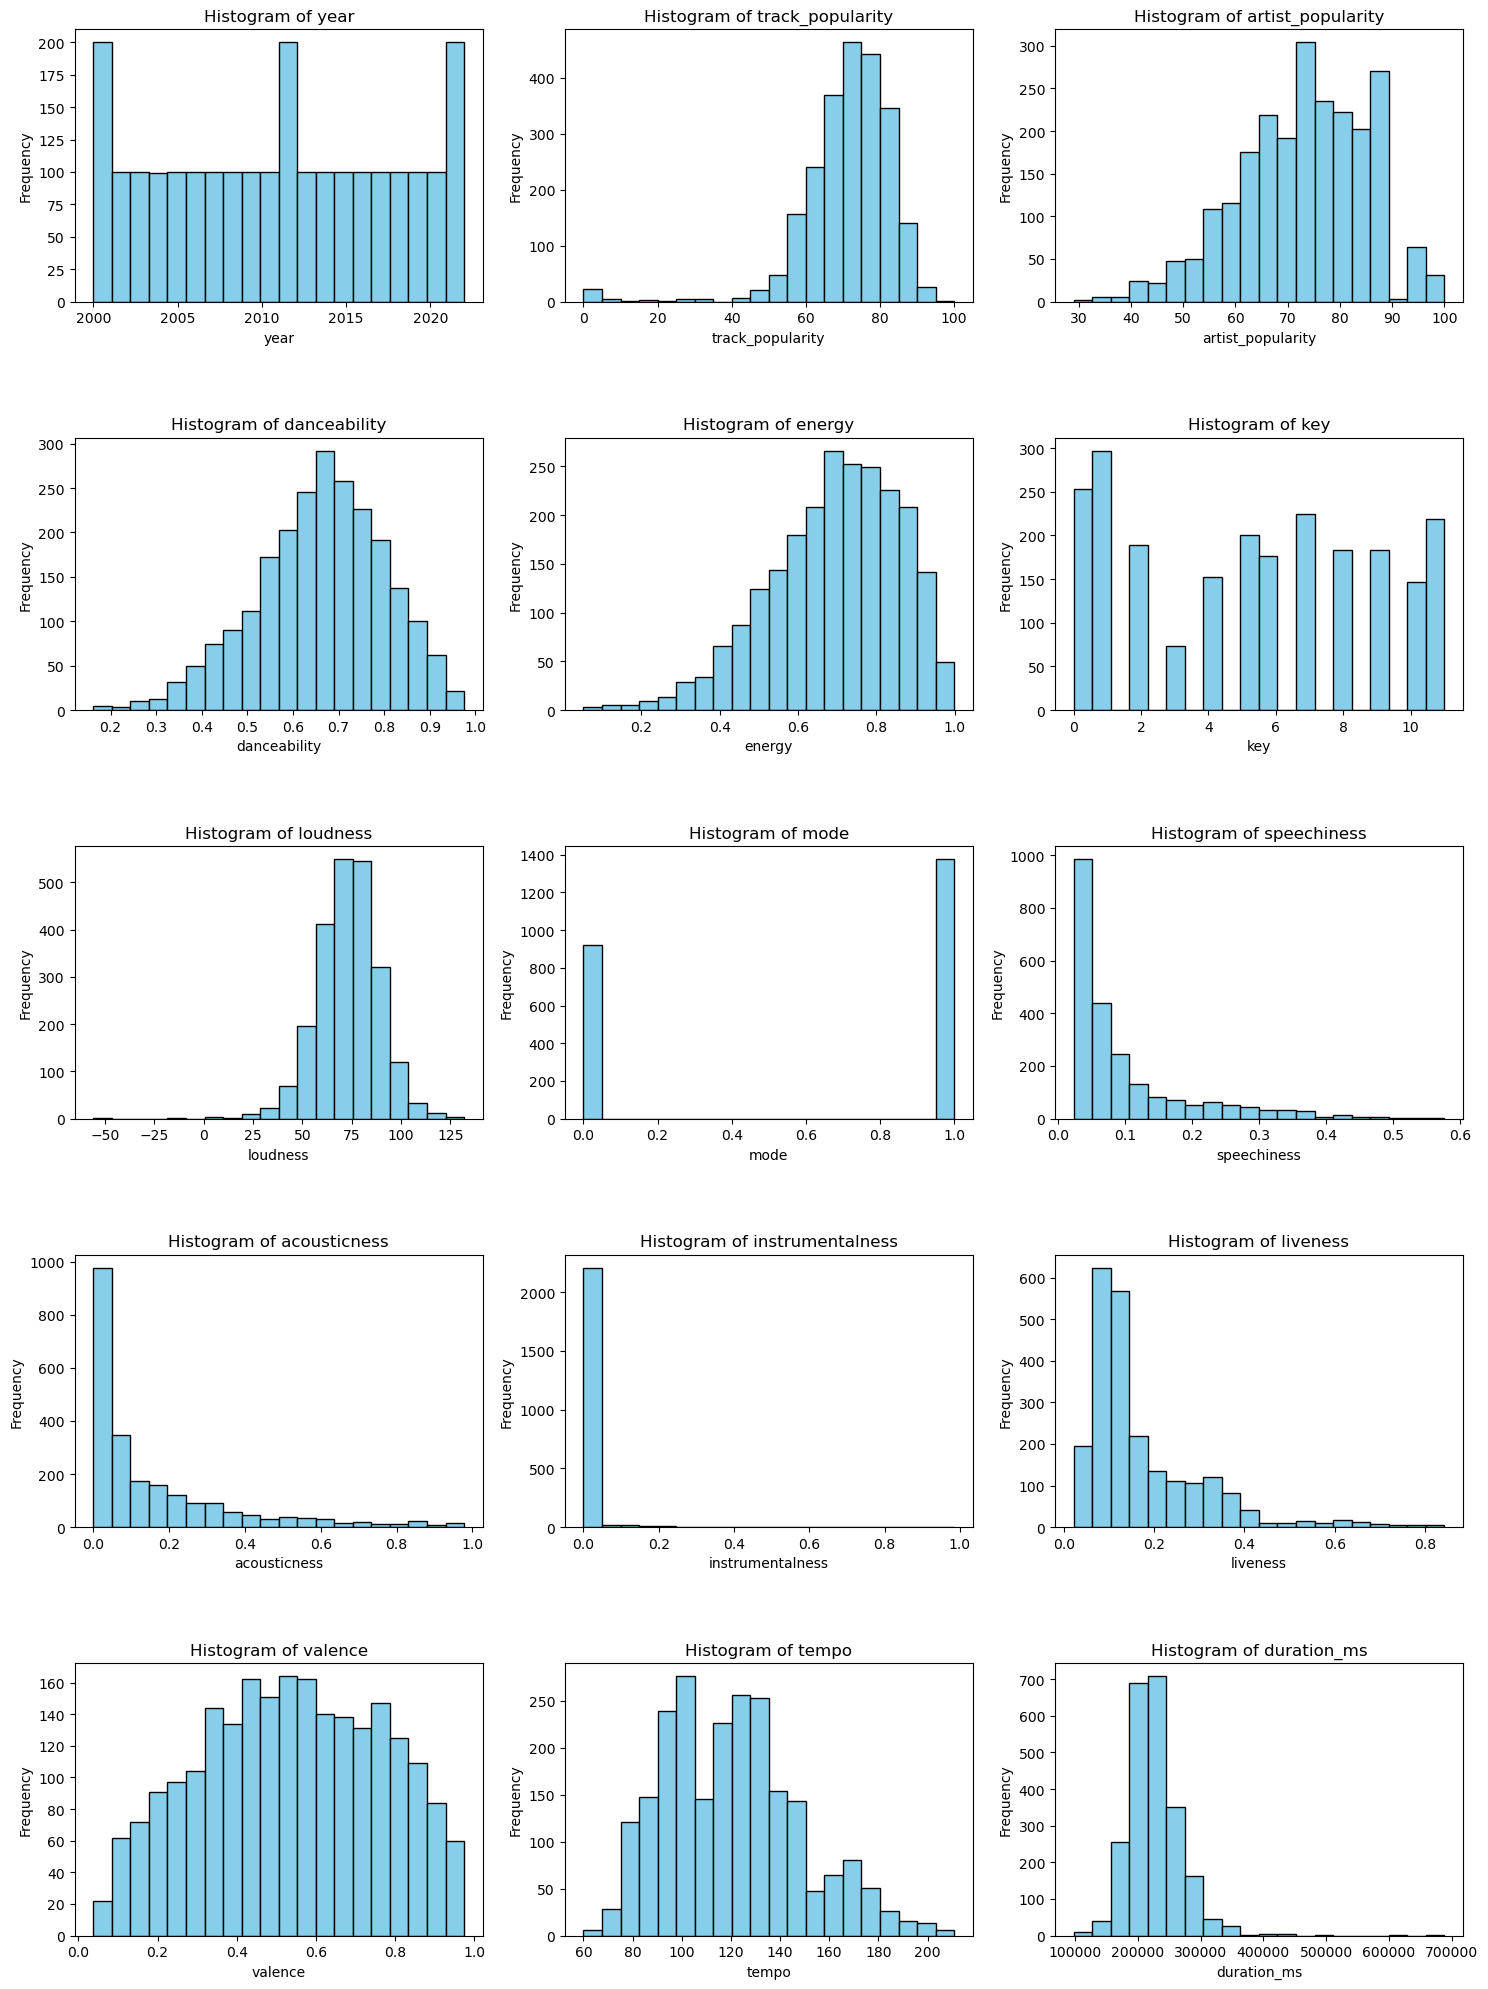

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
ncols = 3
nrows = int(np.ceil(len(numeric_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each numeric column to create a histogram
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots if there are fewer columns than grid spaces
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between rows
plt.show()

From the histograms we can extract some conclusions:
- Year is not relevant and doesn't really make sense as a numeric column
- Instrumentalness presents a shape with the vast majority of the records being 0 and some outliers, so we are going to drop it.
- Duration presents outliers so we are going to clean that so it doesn't affect too much the algorythm.
- As kmeans works with distances, we are going to scale all the values using MinMax to encode them from 0 to 1
- Key is categorical and even though it can be interpreted as a number, should we use it as is it would determine too much the shape of the clustering algorythm.
- We are going to use the popularity as profiling variables


### Data Preparation

In [8]:
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR  
        upper_bound = Q3 + 3 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    return df

# Drop Instrumentalness
df.drop(columns=['instrumentalness'], inplace=True)

# Remove outliers in duration
original_size = df.shape[0]
df = remove_outliers_iqr(df, ['duration_ms'])
new_size = df.shape[0]

print(f"Original dataset size: {original_size} rows")
print(f"Cleaned dataset size: {new_size} rows")
print(f"Number of rows removed: {original_size - new_size}")

df.head()

Original dataset size: 2299 rows
Cleaned dataset size: 2290 rows
Number of rows removed: 9


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,2000,7 Days,73,Born to Do It,Craig David,['british soul'],62,0.659,0.812,4.0,87.0,0.0,0.0487,0.230000,0.0951,0.888,83.014,235133.0
1,2000,Absolutely (Story of a Girl) - Radio Mix,69,The Madding Crowd,Nine Days,['pop rock'],49,0.481,0.940,7.0,71.0,1.0,0.0660,0.000891,0.0939,0.660,96.493,189333.0
2,2000,Against All Odds (Take A Look at Me Now) - Mar...,61,Against All Odds (Take A Look at Me Now) EP,Mariah Carey,['dance pop'; 'pop'; 'urban contemporary'],76,0.542,0.498,1.0,80.0,1.0,0.0299,0.490000,0.1010,0.218,117.763,201933.0
3,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.010300,0.6120,0.684,148.726,167067.0
4,2000,Amazed,72,Lonely Grill,Lonestar,['contemporary country'; 'country'; 'country r...,57,0.561,0.543,1.0,92.0,1.0,0.0324,0.260000,0.1240,0.243,139.803,240867.0


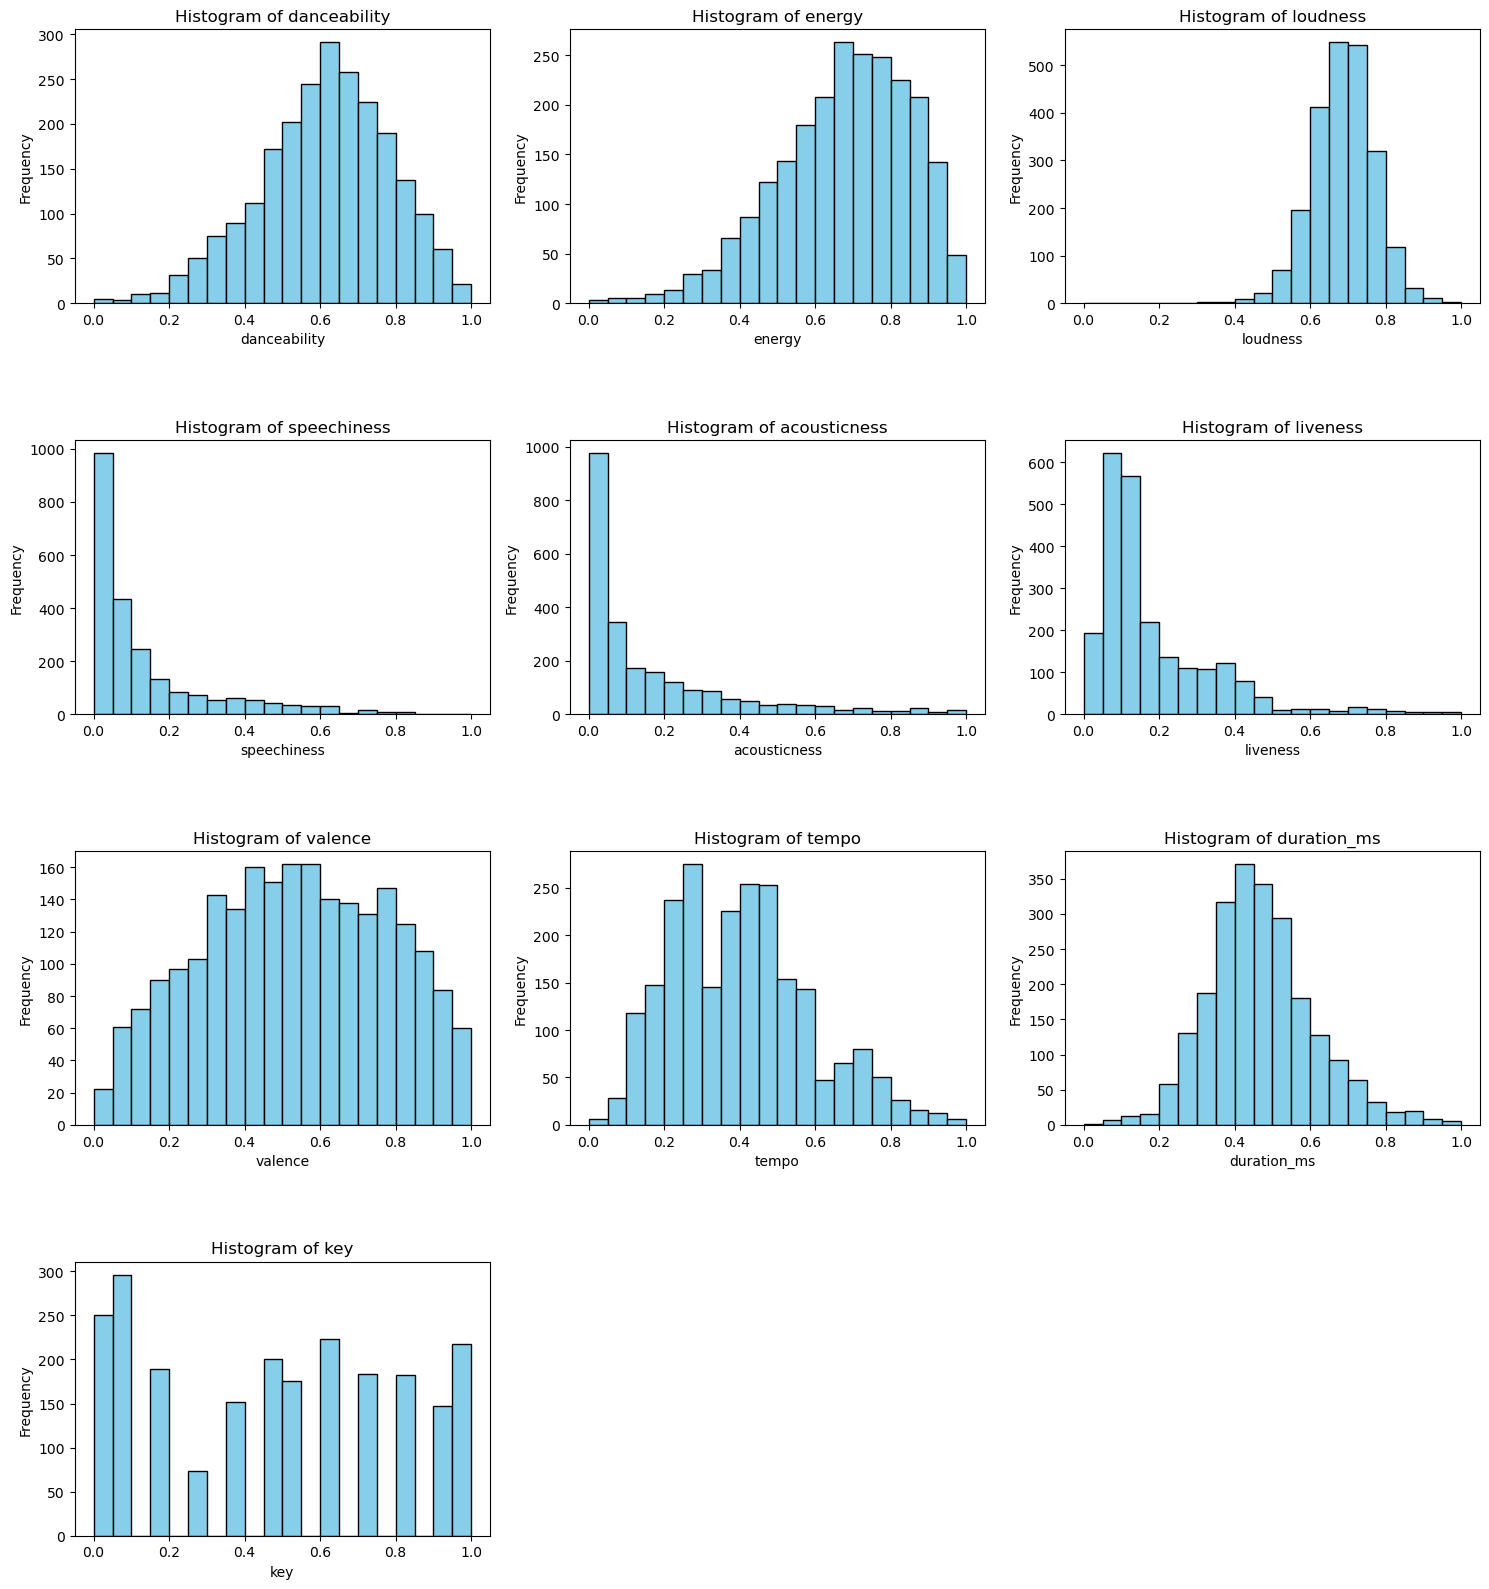

In [9]:
# Normalize the existing features

columns_to_scale = ['danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

ncols = 3
nrows = int(np.ceil(len(columns_to_scale) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each numeric column to create a histogram
for i, col in enumerate(columns_to_scale):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots if there are fewer columns than grid spaces
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between rows
plt.show()


Finally, in the categorical variables we are going to explore the genres to try and extract additional information. We will not use the artist name, the track name nor the album in the clustering.

In [10]:
print(df['artist_genres'].head(20))
print(type(df.loc[0, 'artist_genres']))

0                                      ['british soul']
1                                          ['pop rock']
2            ['dance pop'; 'pop'; 'urban contemporary']
3     ['alternative metal'; 'modern rock'; 'pop punk...
4     ['contemporary country'; 'country'; 'country r...
5                                          ['boy band']
6     ['afrofuturism'; 'alternative r&b'; 'neo soul'...
7     ['alternative metal'; 'nu metal'; 'post-grunge...
8             ['dance pop'; 'latin pop'; 'mexican pop']
9              ['irish rock'; 'permanent wave'; 'rock']
10            ['neo mellow'; 'pop rock'; 'post-grunge']
11                        ['bouncy house'; 'eurodance']
12    ['east coast hip hop'; 'gangster rap'; 'hip ho...
13                                 ['dance pop'; 'pop']
14    ['contemporary country'; 'country'; 'country d...
15               ['celtic rock'; 'europop'; 'pop rock']
16                     ['boy band'; 'dance pop'; 'pop']
17    ['contemporary country'; 'country'; 'count

As we can see the artist_genres column has a string containing a list. Let's further explore

In [11]:
# Parse list
artist_genres = df["artist_genres"].apply(lambda x: x.strip("[]").replace("'", "").split("; "))

# Flatten the genre lists and count occurrences
all_genres = [genre for sublist in artist_genres for genre in sublist]
top_genres = [genre for genre, count in Counter(all_genres).most_common(20)]
top_genres

['pop',
 'dance pop',
 'rap',
 'pop rap',
 'hip hop',
 'r&b',
 'urban contemporary',
 'trap',
 'southern hip hop',
 'modern rock',
 'rock',
 'canadian pop',
 'edm',
 'hip pop',
 'pop dance',
 'atl hip hop',
 'uk pop',
 'neo mellow',
 'gangster rap',
 'pop rock']

As we can see there are a lot of subgenres that can be categorized or blended together onto bigger categories. Southern hip hop, hip hop, rap, pop rap, gangster rap can be all flagged as hip hop; furthermore, pop rap can be flagged as well with pop. We are going to build a regex pattern that allow us to flag genres depending on they presence of keywords.

In [12]:
genres_map = {
    'pop': r'(pop)',
    'rock': r'(rock)',
    'electronic': r'(house|edm|electro|progressive)',
    'latin': r'(latin|puerto|reggaeton)',
    'hip-hop': r'(hip|rap|urban)',
    'indie':r'(indie)',
    'jazz':r'(jazz)',
    'r&b':r'(r&b)',
    'soul':r'(soul)',
    'metal':r'(metal|punk)',
    'classic':r'(classic)',
    'country':r'(country)'
}
import re
for genre, pattern in genres_map.items():
    df[genre] = df['artist_genres'].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int)

df.head(10)

C:\Users\RUA\AppData\Local\Temp\ipykernel_41196\892894336.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[genre] = df['artist_genres'].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int)
C:\Users\RUA\AppData\Local\Temp\ipykernel_41196\892894336.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[genre] = df['artist_genres'].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int)
C:\Users\RUA\AppData\Local\Temp\ipykernel_41196\892894336.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[genre] = df['artist_genres'].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int)
C:\Users\RUA\AppData\Local\Temp\ipykernel_41196\892894336.py:17: UserWarning: This pattern is interpret

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,electronic,latin,hip-hop,indie,jazz,r&b,soul,metal,classic,country
0,2000,7 Days,73,Born to Do It,Craig David,['british soul'],62,0.611316,0.802555,0.363636,...,0,0,0,0,0,0,1,0,0,0
1,2000,Absolutely (Story of a Girl) - Radio Mix,69,The Madding Crowd,Nine Days,['pop rock'],49,0.392374,0.937705,0.636364,...,0,0,0,0,0,0,0,0,0,0
2,2000,Against All Odds (Take A Look at Me Now) - Mar...,61,Against All Odds (Take A Look at Me Now) EP,Mariah Carey,['dance pop'; 'pop'; 'urban contemporary'],76,0.467405,0.471017,0.090909,...,0,0,1,0,0,0,0,0,0,0
3,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.334563,0.892303,0.000000,...,0,0,0,0,0,0,0,1,0,0
4,2000,Amazed,72,Lonely Grill,Lonestar,['contemporary country'; 'country'; 'country r...,57,0.490775,0.518530,0.090909,...,0,0,0,0,0,0,0,0,0,1
5,2000,Back Here,52,Sooner Or Later,BBMAK,['boy band'],35,0.568266,0.942984,0.636364,...,0,0,0,0,0,0,0,0,0,0
6,2000,Bag Lady,59,Mama's Gun,Erykah Badu,['afrofuturism'; 'alternative r&b'; 'neo soul'...,65,0.691267,0.384437,0.454545,...,0,0,0,0,0,1,1,0,0,0
7,2000,Be Like That,63,The Better Life,3 Doors Down,['alternative metal'; 'nu metal'; 'post-grunge...,69,0.399754,0.686411,0.636364,...,0,0,0,0,0,0,0,1,0,0
8,2000,Be With You,60,Enrique,Enrique Iglesias,['dance pop'; 'latin pop'; 'mexican pop'],75,0.640836,0.859571,0.090909,...,0,1,0,0,0,0,0,0,0,0
9,2000,Beautiful Day,68,All That You Can't Leave Behind,U2,['irish rock'; 'permanent wave'; 'rock'],75,0.463715,0.922923,0.181818,...,0,0,0,0,0,0,0,0,0,0


In [13]:
pd.set_option('display.max_colwidth', None)
df[df['track_name'] == 'Be With You'].T

,8
year,2000
track_name,Be With You
track_popularity,60
album,Enrique
artist_name,Enrique Iglesias
artist_genres,['dance pop'; 'latin pop'; 'mexican pop']
artist_popularity,75
danceability,0.640836
energy,0.859571
key,0.090909


Note in this example how the song presents Latin Pop and its flagged as both Latin and Pop.

### Clustering

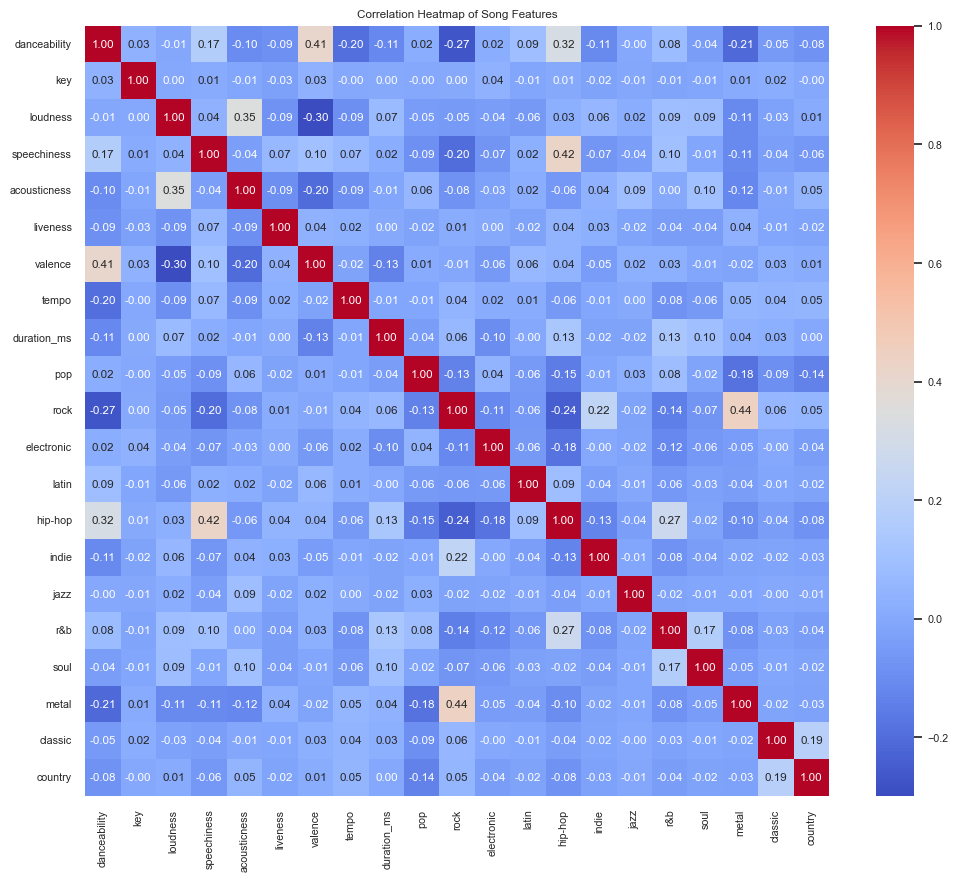

In [14]:
exclude = ['year']
profiling_variables = ['track_popularity', 'artist_popularity', 'energy', 'mode']

X = df.select_dtypes(include=['number']).drop(columns=exclude).drop(columns=profiling_variables)

corr_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap of Song Features")
plt.show()

<Axes: >

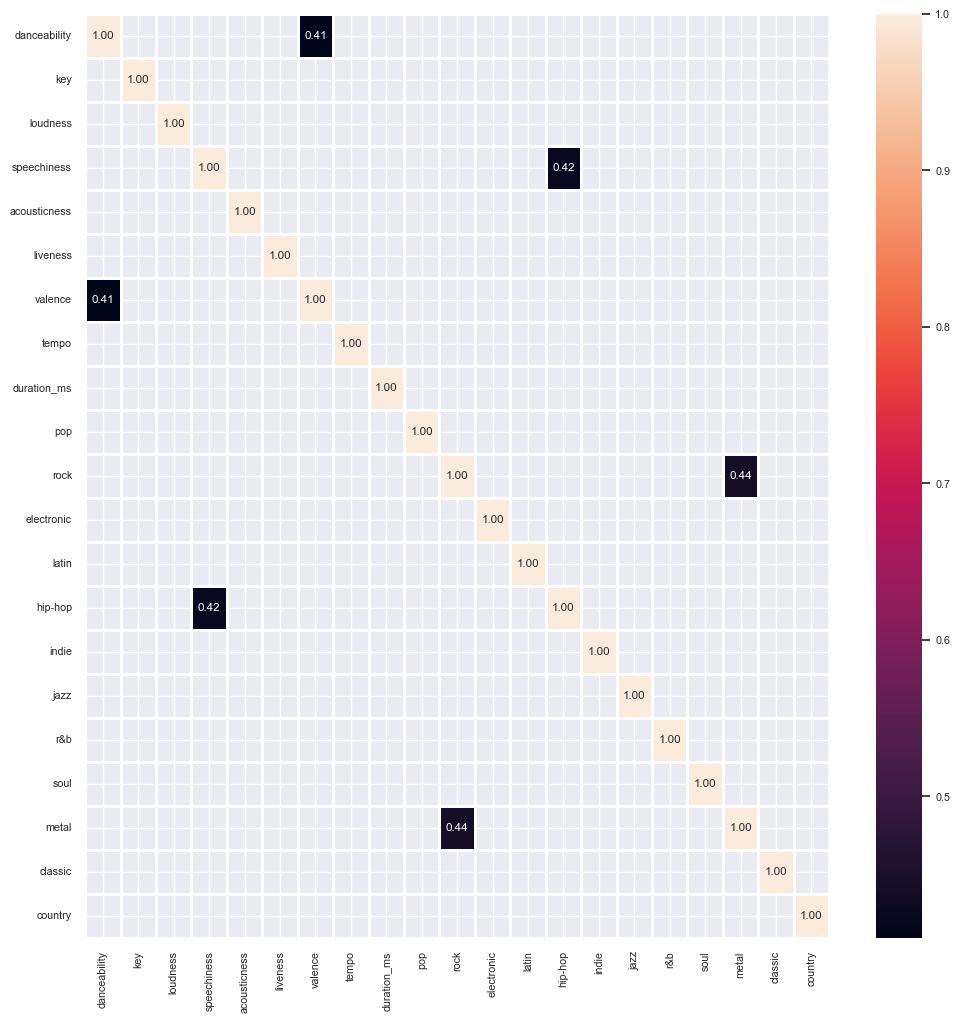

In [15]:
high_corr = corr_matrix[abs(corr_matrix) > 0.35]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

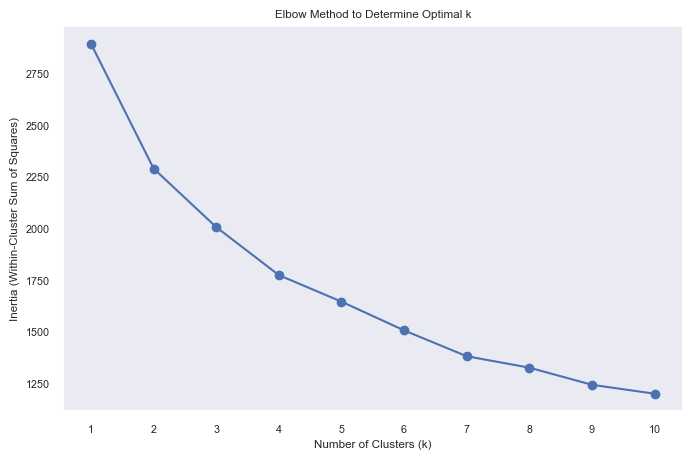

In [16]:
# Perform K-Means for different cluster values
inertia = []
K_range = range(1, 11)  # Checking k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(K_range)
plt.grid()
plt.show()

We can see that past k3 the inertia reduction has diminishing returns.

In [17]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
cluster = df['cluster']


In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, df['cluster'] )

# Inertia does not exist in scikit, so that we need to calculate it

centroids = np.array([X[cluster == i].mean(axis=0) for i in range(k)])
inertia = sum(
    np.sum(np.linalg.norm(X[cluster == i] - centroids[i], axis=1)**2)
    for i in range(k)
)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {inertia:.3f}")
df.head()

Silhouette Score: 0.226
Inertia: 2019.110


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,latin,hip-hop,indie,jazz,r&b,soul,metal,classic,country,cluster
0,2000,7 Days,73,Born to Do It,Craig David,['british soul'],62,0.611316,0.802555,0.363636,...,0,0,0,0,0,1,0,0,0,1
1,2000,Absolutely (Story of a Girl) - Radio Mix,69,The Madding Crowd,Nine Days,['pop rock'],49,0.392374,0.937705,0.636364,...,0,0,0,0,0,0,0,0,0,1
2,2000,Against All Odds (Take A Look at Me Now) - Mariah Only,61,Against All Odds (Take A Look at Me Now) EP,Mariah Carey,['dance pop'; 'pop'; 'urban contemporary'],76,0.467405,0.471017,0.090909,...,0,1,0,0,0,0,0,0,0,2
3,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk'],75,0.334563,0.892303,0.000000,...,0,0,0,0,0,0,1,0,0,1
4,2000,Amazed,72,Lonely Grill,Lonestar,['contemporary country'; 'country'; 'country road'],57,0.490775,0.518530,0.090909,...,0,0,0,0,0,0,0,0,1,1


In [19]:
clustersizes = df.groupby('cluster').agg({
    'track_name': 'count',
    'track_popularity': 'mean',
    'artist_popularity': 'mean',
})
clustersizes

,track_name,track_popularity,artist_popularity
cluster,,,
0,962,71.664241,76.253638
1,517,69.926499,65.597679
2,811,70.741060,73.489519


All clusters have very similar popularity. Let's run an ANOVA analysis to understand the importance of each variable in the cluster. 

In [20]:
results = []
for column in X.columns:
    groups = [group[column].values for name, group in df.groupby('cluster')]
    f_stat, p_value = f_oneway(*groups)
    avg = df[column].mean()
    
    results.append({
        'Column': column,
        'F-statistic': f_stat,
        'p-value': p_value, 
        'Column mean': avg
    })

anova_results_df = pd.DataFrame(results)
anova_results_df.sort_values("p-value")

,Column,F-statistic,p-value,Column mean
10,rock,1391.875683,0.000000e+00,0.137991
13,hip-hop,27628.357662,0.000000e+00,0.363755
9,pop,550.518425,6.686179e-196,0.736681
3,speechiness,268.640400,1.613265e-105,0.136040
18,metal,187.247163,4.895522e-76,0.051528
0,danceability,183.297456,1.465428e-74,0.612510
16,r&b,97.427057,2.478665e-41,0.114410
11,electronic,55.432678,3.098905e-24,0.093886
20,country,41.969124,1.257655e-18,0.015284
14,indie,34.727862,1.387931e-15,0.044105


In [21]:
df_prof = df.groupby("cluster")[X.columns].mean().transpose()
df_prof["Average"] = df_prof.mean(axis=1)
df_prof["Std.dev"] = df_prof.std(axis=1)
df_prof

cluster,0,1,2,Average,Std.dev
danceability,0.597331,0.519662,0.689705,0.602233,0.069506
key,0.482801,0.475470,0.479206,0.479159,0.002993
loudness,0.684169,0.684586,0.689502,0.686085,0.002422
speechiness,0.094823,0.060810,0.232888,0.129507,0.074409
acousticness,0.184315,0.141491,0.145507,0.157105,0.019311
liveness,0.175892,0.187392,0.191468,0.184917,0.006595
valence,0.517715,0.535048,0.546313,0.533025,0.011762
tempo,0.402668,0.421378,0.388000,0.404016,0.013660
duration_ms,0.441543,0.482367,0.492914,0.472275,0.022153
pop,1.000000,0.359768,0.664612,0.674793,0.261473


<Axes: xlabel='cluster'>

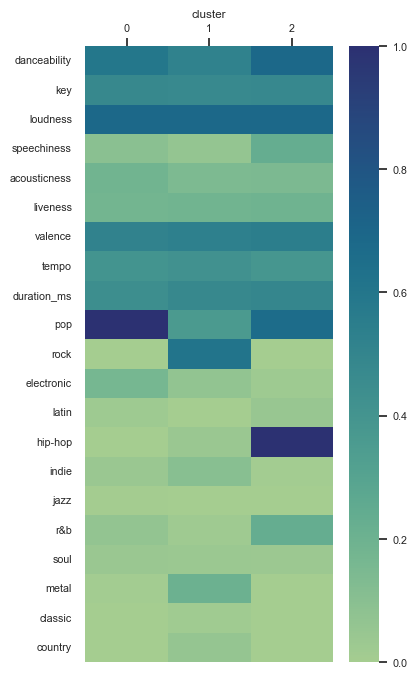

In [22]:
df_heatmap = df_prof[[0, 1, 2]]
plt.figure(figsize=(4, 8))  
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
sns.heatmap(df_heatmap, cmap="crest", annot=False, cbar=True)

## Linear Regression

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset configuration

In [24]:
irrelevant_columns = ['track_name', 'album', 'artist_name', 'cluster', 'artist_genres', 'year']
df = df.drop(columns=irrelevant_columns)

In [25]:
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    
    return df_clean
df = remove_outliers_iqr(df, ['duration_ms'])
df = remove_outliers_iqr(df, ['track_popularity'])

In [26]:
# Separate audio features and genre features
audio_features = ['danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'artist_popularity']
genre_features = ['pop', 'rock', 'electronic', 'latin', 'hip-hop', 'indie', 'jazz', 'r&b', 'soul', 'metal', 'classic', 'country']

In [27]:

# Polynomial transformation for audio features
poly = PolynomialFeatures(degree=2, include_bias=False)
audio_poly = poly.fit_transform(df[audio_features])
# Polynomial transformation for genre features
genre_poly = poly.fit_transform(df[genre_features])

In [28]:
# Prepare the target variable
x = df.drop(columns=['track_popularity'])
y = df['track_popularity']

count    2168.000000
mean       72.226937
std         8.944384
min        47.000000
25%        66.000000
50%        73.000000
75%        79.000000
max        93.000000
Name: track_popularity, dtype: float64


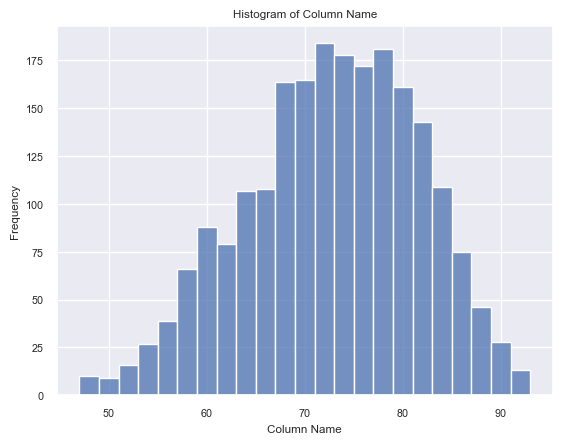

In [29]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to plot
sns.histplot(data=df, x=y, kde=False)  # set kde=True if you want a kernel density estimate overlay

plt.xlabel('Column Name')  # optional: label the x-axis
plt.ylabel('Frequency')    # optional: label the y-axis
plt.title('Histogram of Column Name')  # optional: add a title

print(y.describe())

plt.show()

In [30]:
# cross validation (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (1734, 24)
Sample size test dataset:  (434, 24)


### Step-wise execution

In [31]:
# Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.4}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            print(included, worst_feature, pvalues)
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.4}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [32]:
X_train.head(5).T

,835,1815,2082,1307,1433
artist_popularity,87.000000,74.000000,85.000000,73.000000,72.000000
danceability,0.584256,0.638376,0.676507,0.348093,0.637146
energy,0.715975,0.777215,0.576602,0.512195,0.832119
key,0.454545,0.090909,0.636364,0.363636,0.818182
loudness,0.686170,0.632979,0.680851,0.792553,0.606383
mode,0.000000,1.000000,0.000000,0.000000,1.000000
speechiness,0.117254,0.101174,0.029449,0.031617,0.034146
acousticness,0.330257,0.049272,0.055816,0.710630,0.046715
liveness,0.093796,0.066058,0.161800,0.089294,0.148418
valence,0.741536,0.855815,0.498024,0.099648,0.459575


In [33]:
# Perform stepwise selection
selected_features = stepwise_selection(X_train, y_train)

# Debug: Print selected features
print("Selected features indices:", selected_features)

Add  artist_popularity              with p-value 1.655e-118
Add  duration_ms                    with p-value 1.805e-09
Add  metal                          with p-value 2.066e-06
Add  energy                         with p-value 1.107e-07
Add  indie                          with p-value 4.41e-05
Add  pop                            with p-value 0.002042
Add  r&b                            with p-value 0.008853
Add  acousticness                   with p-value 0.01971
Add  classic                        with p-value 0.04638
Add  speechiness                    with p-value 0.04871
Add  danceability                   with p-value 0.0465
Selected features indices: ['artist_popularity', 'duration_ms', 'metal', 'energy', 'indie', 'pop', 'r&b', 'acousticness', 'classic', 'speechiness', 'danceability']


In [34]:
# Use the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected shape: (1734, 11)
X_test_selected shape: (434, 11)


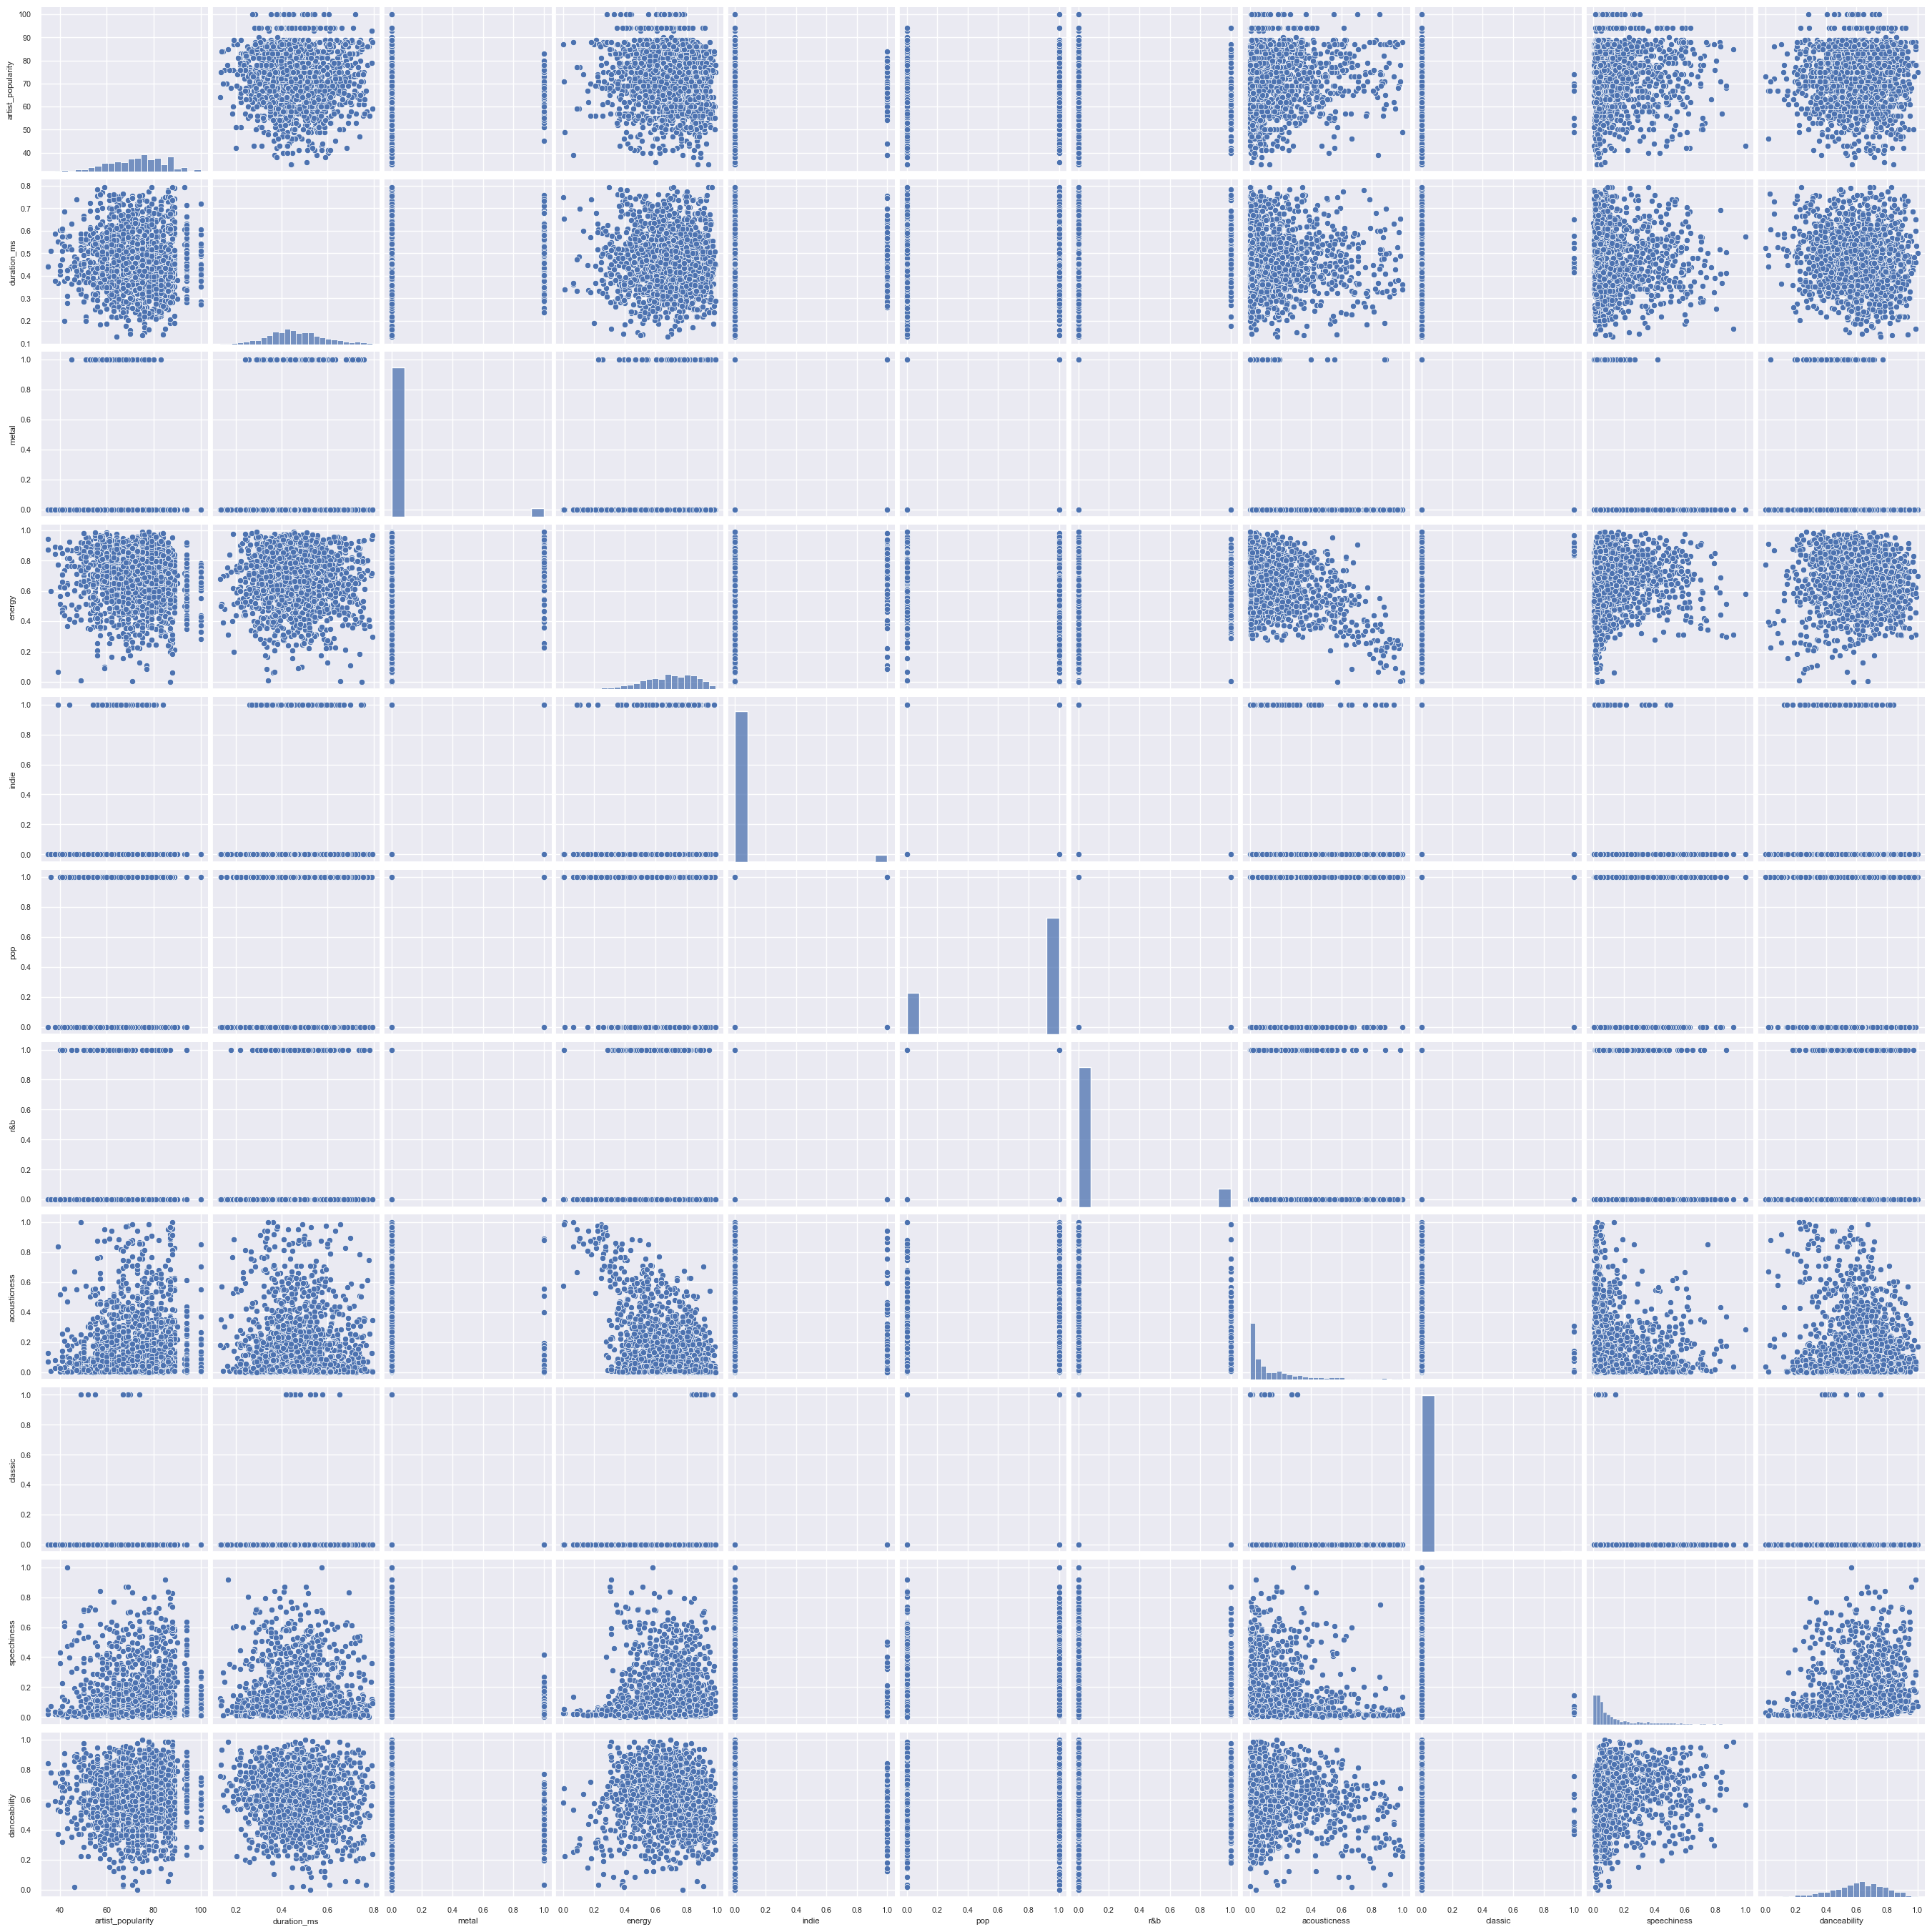

In [35]:
sns.pairplot(X_train_selected)
# Debug: Print shapes of selected feature sets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

<Axes: >

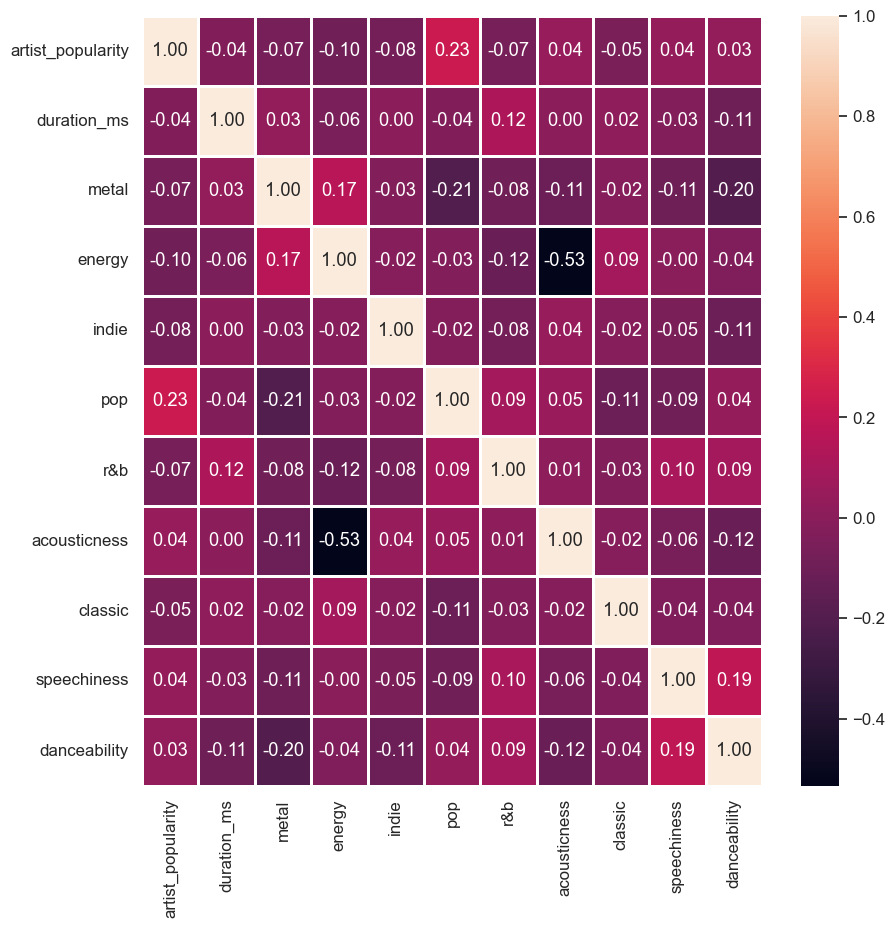

In [36]:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(X_train_selected.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

### Creating and training the model

In [37]:
# Train the model using OLS regression
ols_model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Debug: Print OLS model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     74.38
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.36e-137
Time:                        18:23:01   Log-Likelihood:                -5906.9
No. Observations:                1734   AIC:                         1.184e+04
Df Residuals:                    1722   BIC:                         1.190e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.2357      1.86

In [38]:
# Make predictions
y_pred = ols_model.predict(sm.add_constant(X_test_selected))

In [39]:
# print coefficients (but not confidence intervals: sklearn does not store them)
coeff_df = pd.DataFrame(ols_model.params,X_train_selected.columns,columns=['Coefficient'])
coeff_df

,Coefficient
artist_popularity,0.385315
duration_ms,-8.904765
metal,4.040718
energy,-3.710863
indie,3.254016
pop,-1.453620
r&b,-1.381619
acousticness,2.618332
classic,-4.780019
speechiness,-2.455582


In [40]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 57.37879610516473
R^2 Score: 0.328016320694583


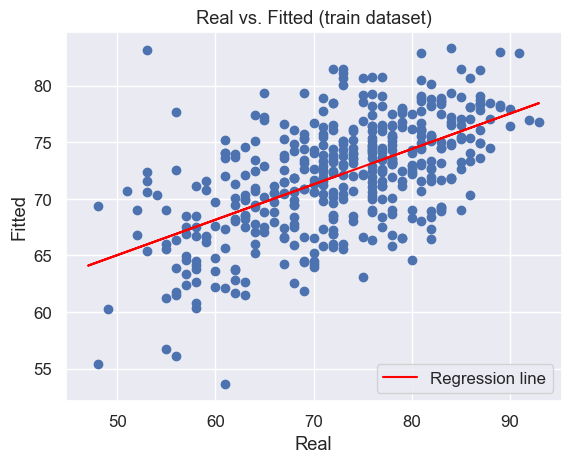

In [ ]:
plt.title("Real vs. Fitted (train dataset)")
plt.scatter(y_test,y_pred)

coef = np.polyfit(y_test, y_pred, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y, poly1d_fn(y), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")
plt.legend()

plt.show()